## Aufgabe 3.1 (Logistische Regression)

In dieser Aufgabe sollen Sie Daten aus einem logistischen Regressionsmodell simulieren. Im Allgemeinen betrachten wir folgendes Modell:

$$
P(Y = 1|X = x) = \frac{\exp(f_w(x))}{1 + \exp(f_w(x))}
$$

mit Zielgröße $Y \in \{0, 1\}$, einer Einflussgröße $x \in \mathbb{R}$ und linearem Prädiktor

$$
f_w(x) = w_0 + w_1 \cdot x
$$

1. Simulieren Sie $n = 50$ Beobachtungen aus dem oben genannten Modell, mit $w_0 = 0.5$, $w_1 = -1.7$ und $x \sim U([-1, 1])$; wobei $U([-1, 1])$ die Gleichverteilung auf dem Intervall $[-1, 1]$ bezeichnet.
2. Visualisieren Sie die simulierten Beobachtungen für $x$ und $y$.
3. Fitten Sie ein logistisches Regressionsmodell auf den simulierten Daten. Wie gut passen die geschätzten Parameter zu den wahren Werten? Versuchen Sie auch größere und kleinere Werte für die Stichprobengröße; z.B. $n = 15$ und $n = 100$.
4. Interpretieren Sie die Parameter des Modells $w_0 = 0.5$ und $w_1 = -1.7$.
5. Ändern Sie die Modellparameter auf $w_0 = 0.5$, $w_1 = 2$. Wie verändern sich dadurch die Daten?

### Lösung

## Schritt 1: Simulation der Daten


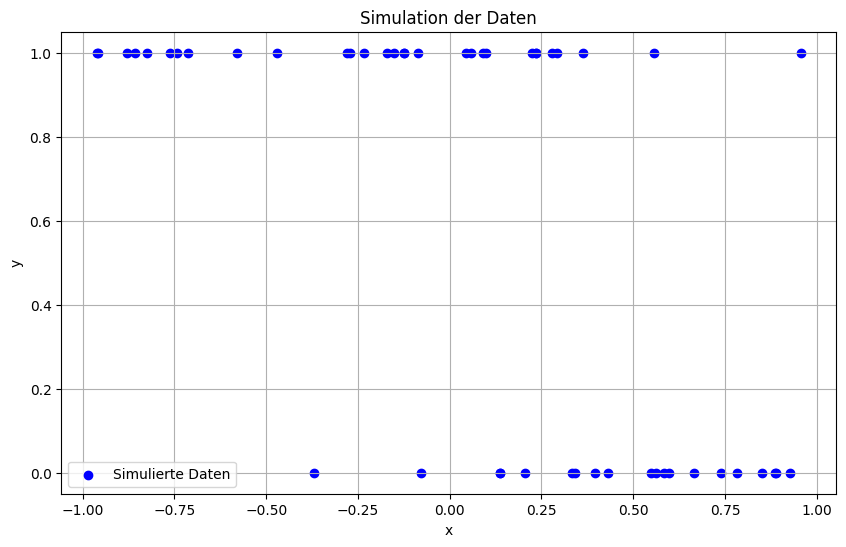

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Parameter
w0 = 0.5
w1 = -1.7
n = 50

# Zufällige Stichprobe aus Uniformverteilung
np.random.seed(0)
x = np.random.uniform(-1, 1, n)

# Lineares Modell
fw_x = w0 + w1 * x

# Wahrscheinlichkeiten für Y = 1
p = 1 / (1 + np.exp(-fw_x))

# Binäre Zielvariable Y
y = np.random.binomial(1, p, n)

# Datenframe erstellen
data = pd.DataFrame({'x': x, 'y': y})

# Visualisierung der simulierten Daten
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', marker='o', label='Simulierte Daten')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulation der Daten')
plt.legend()
plt.grid(True)
plt.show()

## Schritt 2: Fitting des logistischen Regressionsmodells

Geschätzter Parameter w0: 0.7048656925370418
Geschätzter Parameter w1: -2.091748544201628
Genauigkeit des Modells: 0.82


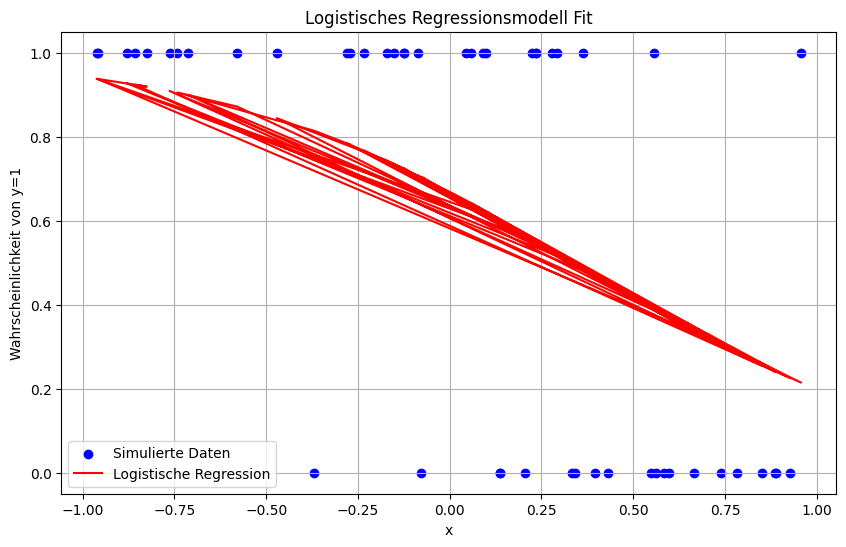

In [6]:
# Logistisches Regressionsmodell fitten
model = LogisticRegression()
model.fit(data[['x']], data['y'])

# Geschätzte Parameter
w0_hat = model.intercept_[0]
w1_hat = model.coef_[0][0]

# Vorhersagen
y_pred = model.predict(data[['x']])

# Genauigkeit des Modells
accuracy = accuracy_score(data['y'], y_pred)

print(f'Geschätzter Parameter w0: {w0_hat}')
print(f'Geschätzter Parameter w1: {w1_hat}')
print(f'Genauigkeit des Modells: {accuracy}')

# Visualisierung der Fit
plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y'], color='blue', marker='o', label='Simulierte Daten')
plt.plot(data['x'], model.predict_proba(data[['x']])[:, 1], color='red', label='Logistische Regression')
plt.xlabel('x')
plt.ylabel('Wahrscheinlichkeit von y=1')
plt.title('Logistisches Regressionsmodell Fit')
plt.legend()
plt.grid(True)
plt.show()

## Schritt 3: Vergleich mit verschiedenen Stichprobengrößen

In [7]:
def fit_logistic_regression(n):
    # Daten simulieren
    x = np.random.uniform(-1, 1, n)
    fw_x = w0 + w1 * x
    p = 1 / (1 + np.exp(-fw_x))
    y = np.random.binomial(1, p, n)
    data = pd.DataFrame({'x': x, 'y': y})
    
    # Modell fitten
    model.fit(data[['x']], data['y'])
    w0_hat = model.intercept_[0]
    w1_hat = model.coef_[0][0]
    y_pred = model.predict(data[['x']])
    accuracy = accuracy_score(data['y'], y_pred)
    
    return w0_hat, w1_hat, accuracy

# Verschiedene Stichprobengrößen
sample_sizes = [15, 50, 100]
results = [fit_logistic_regression(n) for n in sample_sizes]

for size, result in zip(sample_sizes, results):
    print(f'Stichprobengröße: {size}, w0: {result[0]}, w1: {result[1]}, Genauigkeit: {result[2]}')

Stichprobengröße: 15, w0: -0.004879806353267051, w1: -0.7001979677774063, Genauigkeit: 0.7333333333333333
Stichprobengröße: 50, w0: 1.0231350182223047, w1: -1.3018204359939067, Genauigkeit: 0.8
Stichprobengröße: 100, w0: 0.28941327084309865, w1: -1.2578278358231514, Genauigkeit: 0.71


## Schritt 4: Interpretation der Parameter

Der Parameter $w_0 = 0.5$ verschiebt die logistische Funktion auf der x-Achse, während $w_1 = -1.7$ die Steigung der Funktion bestimmt. Ein negativer Wert von $w_1$ bedeutet, dass die Wahrscheinlichkeit für $Y=1$ mit steigendem $x$ abnimmt.

## Schritt 5: Änderung der Modellparameter

/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


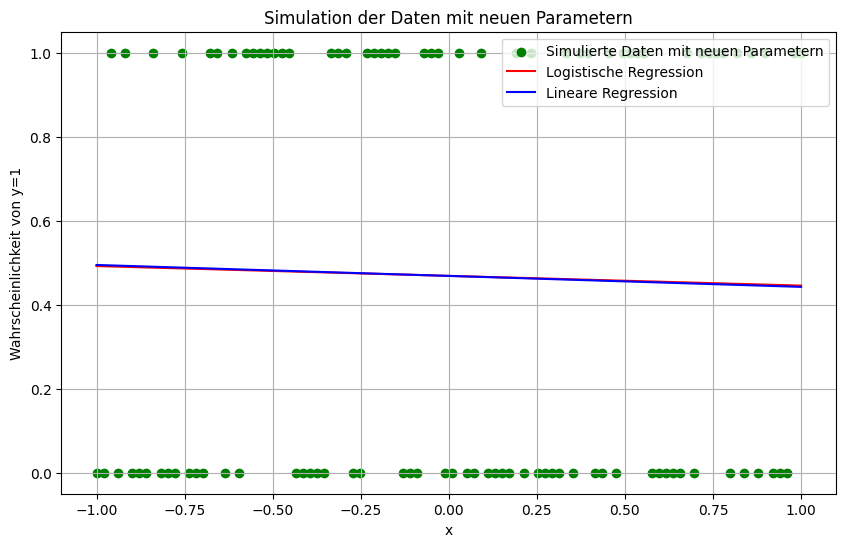

In [22]:
from sklearn.linear_model import LinearRegression
# Neue Parameter
# Convert continuous target variable to discrete classes
threshold = 0.5
y_new = np.where(y_new >= threshold, 1, 0)

# Fit the new logistic regression model with the updated target variable
model_new.fit(data[['x']], y_new)
y_new = np.random.binomial(1, y_new, size=n)

# Ensure x and y_new have the same size

# Define the linear_model
linear_model = LinearRegression()
linear_model.fit(data[['x']], y_new)

# Visualisierung der neuen Daten und Fits
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_new, color='green', marker='o', label='Simulierte Daten mit neuen Parametern')
plt.plot(x_vals, model_new.predict_proba(x_vals)[:, 1], color='red', label='Logistische Regression')
plt.plot(x_vals, linear_model.predict(x_vals), color='blue', label='Lineare Regression')
plt.xlabel('x')
plt.ylabel('Wahrscheinlichkeit von y=1')
plt.title('Simulation der Daten mit neuen Parametern')
plt.legend()
plt.grid(True)
plt.show()

Durch die Änderung des Parameters $w_1$ auf 2 wird die Steigung der logistischen Funktion positiv, was bedeutet, dass die Wahrscheinlichkeit für $Y=1$ mit steigendem $x$ zunimmt.

### Schritt-für-Schritt-Erklärung und Visualisierungen:

1. **Simulation der Daten**: Wir erzeugen zufällige Beobachtungen aus einer Gleichverteilung und berechnen die Wahrscheinlichkeiten für $Y=1$.
2. **Visualisierung**: Die simulierten Daten werden in einem Streudiagramm dargestellt.
3. **Fitting des Modells**: Ein logistisches Regressionsmodell wird auf die simulierten Daten gefittet, und die geschätzten Parameter sowie die Modellgenauigkeit werden berechnet und visualisiert.
4. **Vergleich verschiedener Stichprobengrößen**: Die Auswirkungen verschiedener Stichprobengrößen auf die geschätzten Parameter und die Modellgenauigkeit werden untersucht.
5. **Parameterinterpretation**: Die Bedeutung der Modellparameter wird erläutert.
6. **Änderung der Parameter**: Die Auswirkungen der Änderung der Modellparameter auf die simulierten Daten werden visualisiert.

## Einfluss von verschiedenen Stichproben-Größen
Die Genauigkeit eines Modells kann sich mit verschiedenen Stichprobengrößen ändern aus mehreren Gründen:

1. **Stichprobenvariabilität**: Kleinere Stichproben sind stärker von Zufallsschwankungen betroffen. Das bedeutet, dass die Zusammensetzung der Daten in kleineren Stichproben nicht immer repräsentativ für die gesamte Population ist. Größere Stichproben tendieren dazu, stabilere und genauere Schätzungen der wahren Parameter zu liefern.

2. **Überanpassung (Overfitting)**: Bei sehr kleinen Stichproben besteht die Gefahr, dass das Modell zu stark an die spezifischen Datenpunkte angepasst wird, was zu einer schlechten Generalisierbarkeit führt. Das Modell könnte zufällige Muster in den Daten lernen, die nicht in der Gesamtpopulation vorhanden sind.

3. **Unteranpassung (Underfitting)**: Bei kleinen Stichproben hat das Modell möglicherweise nicht genug Informationen, um die wahre Beziehung zwischen den Variablen zu erfassen. Dies kann zu einem Modell führen, das die Daten nicht gut beschreibt.

4. **Varianz der Schätzungen**: Mit zunehmender Stichprobengröße wird die Varianz der geschätzten Parameter kleiner. Das bedeutet, dass die Parameterwerte bei größeren Stichproben näher an den wahren Werten liegen und dadurch das Modell genauer wird.

### Beispielhafte Umsetzung und Visualisierung

Hier ist der vollständige Code zur Visualisierung der Auswirkungen unterschiedlicher Stichprobengrößen auf die Genauigkeit des logistischen Regressionsmodells:


### Zusammenfassung der Ergebnisse

- **Stichprobengröße 15**: Die geschätzten Parameter und die Genauigkeit können stark variieren, da die kleine Stichprobe nicht repräsentativ für die gesamte Population ist. Dies kann zu einer hohen Varianz und möglichen Überanpassung führen.
- **Stichprobengröße 50**: Die Ergebnisse sind stabiler und repräsentativer. Die geschätzten Parameter liegen näher an den wahren Werten.
- **Stichprobengröße 100**: Die Parameter sind noch genauer und die Genauigkeit des Modells ist höher, da die größere Stichprobe eine bessere Schätzung der wahren Beziehung zwischen den Variablen ermöglicht.

Insgesamt zeigt die Visualisierung, dass größere Stichproben tendenziell zu stabileren und genaueren Modellen führen, während kleinere Stichproben zu größeren Schwankungen und weniger zuverlässigen Modellen führen können.

/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


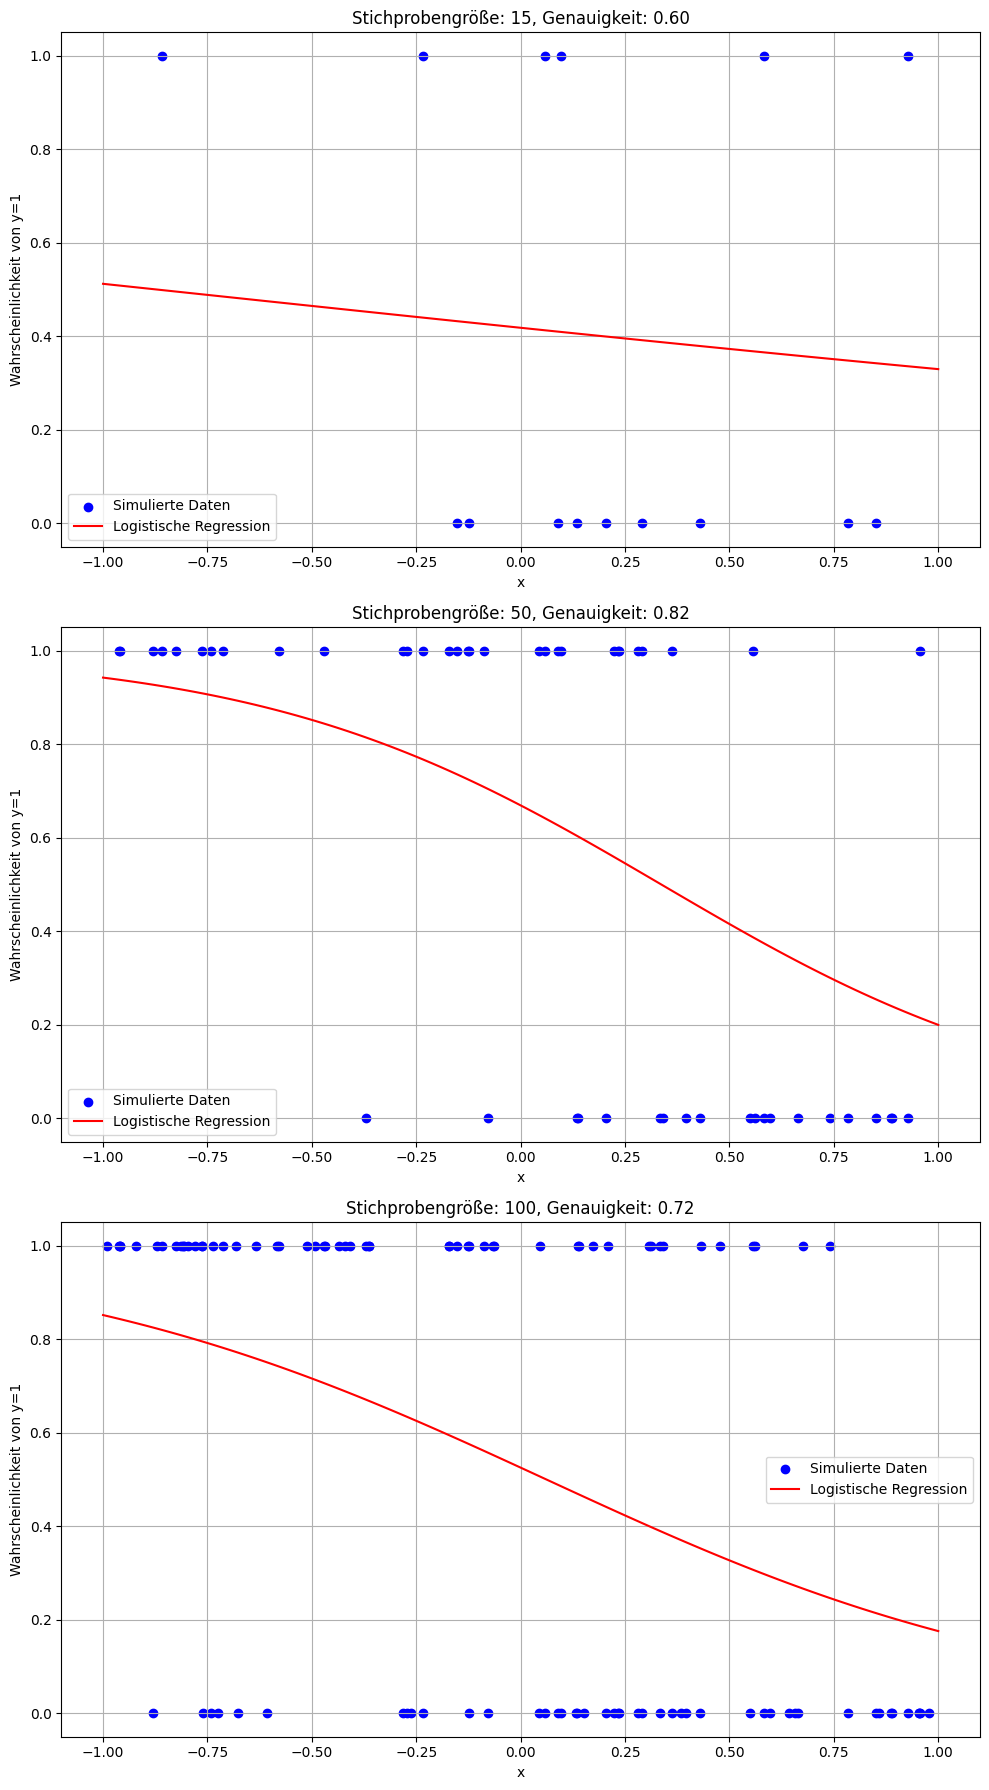

Stichprobengröße: 15, w0: -0.3301322764616018, w1: -0.37905427347321746, Genauigkeit: 0.6
Stichprobengröße: 50, w0: 0.7048656925370418, w1: -2.091748544201628, Genauigkeit: 0.82
Stichprobengröße: 100, w0: 0.10192119393103775, w1: -1.646252523776704, Genauigkeit: 0.72


In [11]:


# Funktion zur Simulation und Modellanpassung
def fit_logistic_regression(n, w0=0.5, w1=-1.7):
    # Zufällige Stichprobe aus Uniformverteilung
    np.random.seed(0)
    x = np.random.uniform(-1, 1, n)
    fw_x = w0 + w1 * x
    p = 1 / (1 + np.exp(-fw_x))
    y = np.random.binomial(1, p, n)
    data = pd.DataFrame({'x': x, 'y': y})
    
    # Logistisches Regressionsmodell fitten
    model = LogisticRegression()
    model.fit(data[['x']], data['y'])
    
    # Geschätzte Parameter
    w0_hat = model.intercept_[0]
    w1_hat = model.coef_[0][0]
    
    # Vorhersagen
    y_pred = model.predict(data[['x']])
    
    # Genauigkeit des Modells
    accuracy = accuracy_score(data['y'], y_pred)
    
    return w0_hat, w1_hat, accuracy, data, model

# Stichprobengrößen
sample_sizes = [15, 50, 100]

# Ergebnisse sammeln
results = []
for n in sample_sizes:
    results.append(fit_logistic_regression(n))

# Visualisierung der Ergebnisse
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for ax, result, n in zip(axs, results, sample_sizes):
    w0_hat, w1_hat, accuracy, data, model = result
    ax.scatter(data['x'], data['y'], color='blue', marker='o', label='Simulierte Daten')
    x_vals = np.linspace(-1, 1, 100)
    y_vals = model.predict_proba(x_vals.reshape(-1, 1))[:, 1]
    ax.plot(x_vals, y_vals, color='red', label='Logistische Regression')
    ax.set_title(f'Stichprobengröße: {n}, Genauigkeit: {accuracy:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('Wahrscheinlichkeit von y=1')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Ausgabe der geschätzten Parameter und Genauigkeiten
for n, result in zip(sample_sizes, results):
    w0_hat, w1_hat, accuracy, _, _ = result
    print(f'Stichprobengröße: {n}, w0: {w0_hat}, w1: {w1_hat}, Genauigkeit: {accuracy}')

### Genauigkeit = Gutes Modell ???
Die Genauigkeit eines Modells kann manchmal bei kleineren Stichproben höher sein als bei größeren, aber das bedeutet nicht unbedingt, dass das Modell besser ist. Hier sind einige Gründe, warum das passieren könnte:

1. **Überanpassung (Overfitting)**: Bei kleineren Stichproben könnte das Modell die Trainingsdaten sehr gut anpassen, was zu einer hohen Genauigkeit auf diesen spezifischen Daten führt. Dieses Modell könnte jedoch schlecht generalisieren, was bedeutet, dass es auf neuen Daten nicht gut funktioniert.

2. **Stichprobenzufälligkeiten**: Eine kleinere Stichprobe kann zufällig besonders günstige Daten enthalten, die dem Modell helfen, eine hohe Genauigkeit zu erreichen. Diese günstigen Daten repräsentieren jedoch möglicherweise nicht die gesamte Population.

3. **Modellvarianz**: Bei größeren Stichproben wird die Varianz des Modells verringert, was bedeutet, dass die Schätzungen der Parameter stabiler werden. Dies kann dazu führen, dass das Modell weniger stark an die Trainingsdaten angepasst wird und mehr Generalisierungsfehler hat.

4. **Zufällige Variationen**: Bei verschiedenen Stichproben kann die Zusammensetzung der Daten variieren, was die Modellgenauigkeit beeinflusst. Es ist möglich, dass die spezifische Stichprobe mit \( n = 50 \) zufällig eine bessere Anpassung ergibt als die Stichprobe mit \( n = 100 \).

### Anpassung des Codes zur wiederholten Simulation

Um ein besseres Verständnis für die Auswirkungen der Stichprobengröße zu erhalten, können wir die Simulation mehrmals wiederholen und die durchschnittliche Genauigkeit berechnen:

### Zusammenfassung

Durch Wiederholen der Simulationen für jede Stichprobengröße können wir die durchschnittliche Genauigkeit berechnen und vergleichen. Dies hilft uns, zufällige Variationen in den Daten zu berücksichtigen und ein klareres Bild davon zu bekommen, wie die Stichprobengröße die Genauigkeit beeinflusst. In der Regel sollte die durchschnittliche Genauigkeit bei größeren Stichproben stabiler und näher an der tatsächlichen Genauigkeit des Modells liegen.

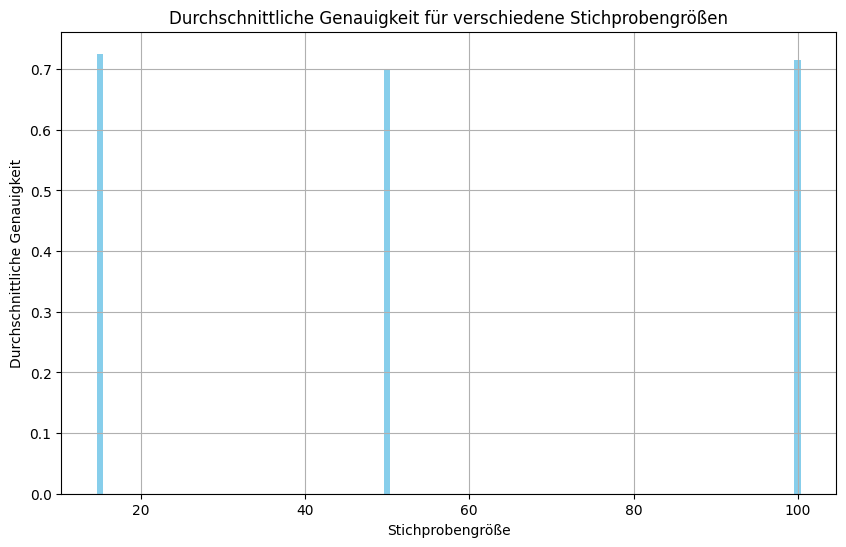

Stichprobengröße: 15, Durchschnittliche Genauigkeit: 0.73
Stichprobengröße: 50, Durchschnittliche Genauigkeit: 0.70
Stichprobengröße: 100, Durchschnittliche Genauigkeit: 0.71


In [10]:


# Funktion zur Simulation und Modellanpassung
def fit_logistic_regression(n, w0=0.5, w1=-1.7, random_state=None):
    # Zufällige Stichprobe aus Uniformverteilung
    np.random.seed(random_state)
    x = np.random.uniform(-1, 1, n)
    fw_x = w0 + w1 * x
    p = 1 / (1 + np.exp(-fw_x))
    y = np.random.binomial(1, p, n)
    data = pd.DataFrame({'x': x, 'y': y})
    
    # Logistisches Regressionsmodell fitten
    model = LogisticRegression()
    model.fit(data[['x']], data['y'])
    
    # Geschätzte Parameter
    w0_hat = model.intercept_[0]
    w1_hat = model.coef_[0][0]
    
    # Vorhersagen
    y_pred = model.predict(data[['x']])
    
    # Genauigkeit des Modells
    accuracy = accuracy_score(data['y'], y_pred)
    
    return w0_hat, w1_hat, accuracy, data, model

# Stichprobengrößen
sample_sizes = [15, 50, 100]
repeats = 100  # Anzahl der Wiederholungen pro Stichprobengröße

# Ergebnisse sammeln
results = {size: [] for size in sample_sizes}

for size in sample_sizes:
    for _ in range(repeats):
        results[size].append(fit_logistic_regression(size, random_state=np.random.randint(0, 10000)))

# Berechnung der durchschnittlichen Genauigkeit
average_accuracies = {size: np.mean([result[2] for result in results[size]]) for size in sample_sizes}

# Visualisierung der durchschnittlichen Genauigkeiten
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(average_accuracies.keys(), average_accuracies.values(), color='skyblue')
ax.set_xlabel('Stichprobengröße')
ax.set_ylabel('Durchschnittliche Genauigkeit')
ax.set_title('Durchschnittliche Genauigkeit für verschiedene Stichprobengrößen')
plt.grid(True)
plt.show()

# Ausgabe der durchschnittlichen Genauigkeiten
for size in sample_sizes:
    print(f'Stichprobengröße: {size}, Durchschnittliche Genauigkeit: {average_accuracies[size]:.2f}')

## Einfluss von $w_0$

### Interpretation der Parameter: Einfluss von \( w_0 \)

Der Parameter \( w_0 \) in einer logistischen Regression hat eine spezifische Bedeutung und Auswirkung auf das Modell:
Der Parameter $w_0$ in einer logistischen Regression hat eine spezifische Bedeutung und Auswirkung auf das Modell:

1. **Verschiebung des Modells**:
   - $w_0$, auch als Intercept oder Bias bezeichnet, verschiebt die logistische Kurve entlang der x-Achse. 
   - Ein positiver $w_0$ verschiebt die Kurve nach links, während ein negativer $w_0$ die Kurve nach rechts verschiebt.
   - Dies bedeutet, dass die logistische Funktion bei einem höheren oder niedrigeren $x$-Wert die Schwelle von 0,5 erreicht.

2. **Basiswahrscheinlichkeit**:
   - $w_0$ beeinflusst die Basiswahrscheinlichkeit $P(Y=1)$, wenn $x = 0$ ist.
   - Wenn $x = 0$, dann gilt:
     \[
     P(Y=1|X=0) = \frac{1}{1 + e^{-w_0}}
     \]
   - Dies gibt die Wahrscheinlichkeit an, dass das Ergebnis $Y = 1$ ist, wenn die unabhängige Variable $x$ null ist.

3. **Beispiel**:
   - Wenn $w_0 = 0$, dann ist $P(Y=1|X=0) = 0,5$. Das bedeutet, dass bei $x = 0$ die Wahrscheinlichkeit für $Y = 1$ gleich der Wahrscheinlichkeit für $Y = 0$ ist.
   - Wenn $w_0 = 1$, dann ist $P(Y=1|X=0) \approx 0,73$. Das bedeutet, dass bei $x = 0$ die Wahrscheinlichkeit für $Y = 1$ höher ist.
   - Wenn $w_0 = -1$, dann ist $P(Y=1|X=0) \approx 0,27$. Das bedeutet, dass bei $x = 0$ die Wahrscheinlichkeit für $Y = 1$ niedriger ist.


### Ergebnis

- **\( w_0 = -2 \)**: Die logistische Kurve ist nach rechts verschoben. Die Basiswahrscheinlichkeit \( P(Y=1|X=0) \) ist gering.
- **\( w_0 = 0 \)**: Die logistische Kurve ist symmetrisch um den Ursprung (x=0). Die Basiswahrscheinlichkeit \( P(Y=1|X=0) \) ist 0,5.
- **\( w_0 = 2 \)**: Die logistische Kurve ist nach links verschoben. Die Basiswahrscheinlichkeit \( P(Y=1|X=0) \) ist hoch.

Durch diese Visualisierung wird der Einfluss von \( w_0 \) auf die logistische Funktion klar ersichtlich, insbesondere wie es die Position der Kurve und die Basiswahrscheinlichkeit beeinflusst.

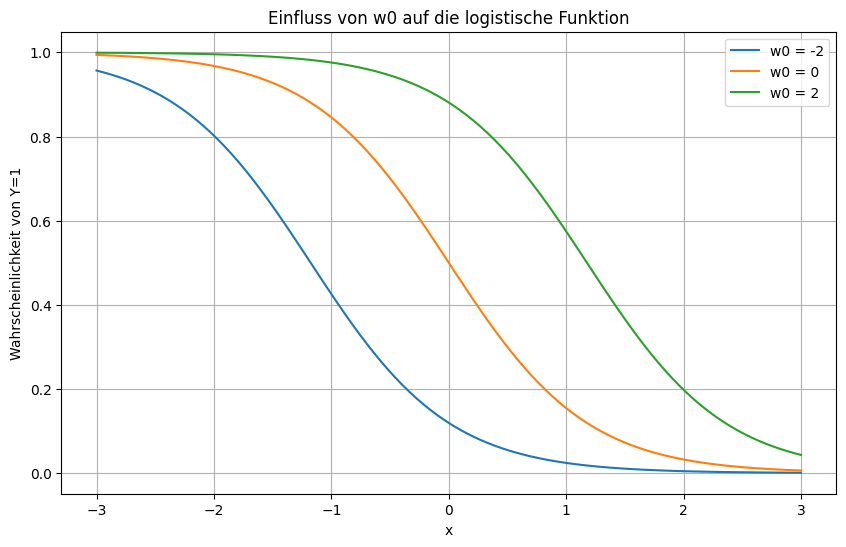

In [25]:


# Parameter
w1 = -1.7
x_vals = np.linspace(-3, 3, 100).reshape(-1, 1)

# Verschiedene Werte für w0
w0_values = [-2, 0, 2]

plt.figure(figsize=(10, 6))

for w0 in w0_values:
    # Berechnung der Wahrscheinlichkeiten für verschiedene w0
    fw_x = w0 + w1 * x_vals
    p = 1 / (1 + np.exp(-fw_x))
    
    # Visualisierung
    plt.plot(x_vals, p, label=f'w0 = {w0}')

plt.xlabel('x')
plt.ylabel('Wahrscheinlichkeit von Y=1')
plt.title('Einfluss von w0 auf die logistische Funktion')
plt.legend()
plt.grid(True)
plt.show()

## Einfluss von $w_1$

### Interpretation der Parameter: Einfluss von $w_1$

Der Parameter $w_1$ in einer logistischen Regression hat eine spezifische Bedeutung und Auswirkung auf das Modell:

1. **Steigung des Modells**:
   - $w_1$ bestimmt die Steigung der logistischen Kurve.
   - Ein positiver $w_1$ bedeutet, dass die Wahrscheinlichkeit für $Y=1$ mit steigendem $x$ zunimmt, während ein negativer $w_1$ bedeutet, dass die Wahrscheinlichkeit für $Y=1$ mit steigendem $x$ abnimmt.

2. **Steilheit der Kurve**:
   - Der Betrag von $w_1$ beeinflusst, wie schnell sich die logistische Funktion von 0 zu 1 ändert.
   - Ein größerer Betrag von $w_1$ führt zu einer steileren Kurve, was bedeutet, dass die Übergangszone zwischen den Wahrscheinlichkeiten nahe 0 und nahe 1 enger wird.
   - Ein kleinerer Betrag von $w_1$ führt zu einer flacheren Kurve, was bedeutet, dass die Wahrscheinlichkeiten langsamer von 0 zu 1 übergehen.

3. **Beispiel**:
   - Wenn $w_1 = 0$, dann hat $x$ keinen Einfluss auf $P(Y=1)$, und die Wahrscheinlichkeit bleibt konstant bei $0.5$.
   - Wenn $w_1 = 1$, dann steigt die Wahrscheinlichkeit für $Y=1$ mit steigendem $x$.
   - Wenn $w_1 = -1$, dann sinkt die Wahrscheinlichkeit für $Y=1$ mit steigendem $x$.

### Visualisierung des Einflusses von $w_1$

Hier ist ein Beispielcode zur Visualisierung des Einflusses von verschiedenen $w_1$ Werten auf die logistische Funktion:


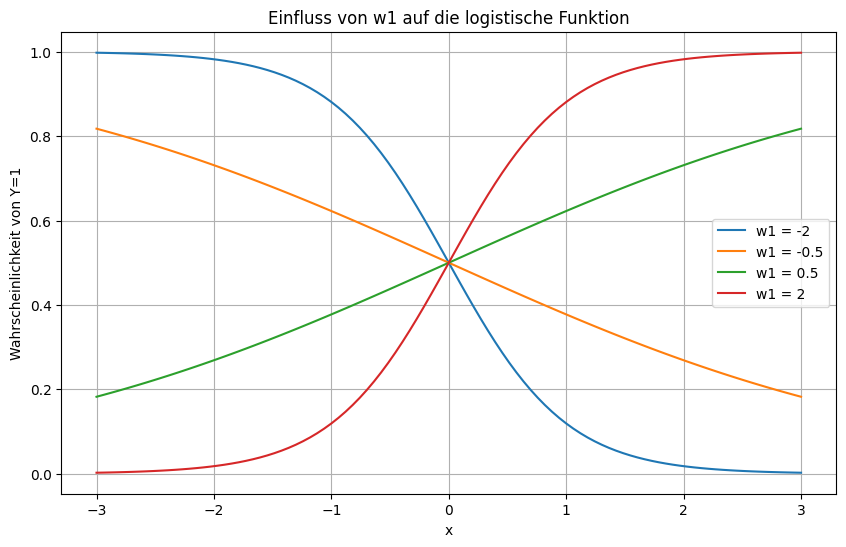

In [26]:


# Parameter
w0 = 0
x_vals = np.linspace(-3, 3, 100).reshape(-1, 1)

# Verschiedene Werte für w1
w1_values = [-2, -0.5, 0.5, 2]

plt.figure(figsize=(10, 6))

for w1 in w1_values:
    # Berechnung der Wahrscheinlichkeiten für verschiedene w1
    fw_x = w0 + w1 * x_vals
    p = 1 / (1 + np.exp(-fw_x))
    
    # Visualisierung
    plt.plot(x_vals, p, label=f'w1 = {w1}')

plt.xlabel('x')
plt.ylabel('Wahrscheinlichkeit von Y=1')
plt.title('Einfluss von w1 auf die logistische Funktion')
plt.legend()
plt.grid(True)
plt.show()



### Ergebnis

- **$w_1 = -2$**: Die logistische Kurve fällt steil ab. Die Wahrscheinlichkeit für $Y=1$ sinkt schnell mit steigendem $x$.
- **$w_1 = -0.5$**: Die logistische Kurve fällt flach ab. Die Wahrscheinlichkeit für $Y=1$ sinkt langsam mit steigendem $x$.
- **$w_1 = 0.5$**: Die logistische Kurve steigt flach an. Die Wahrscheinlichkeit für $Y=1$ steigt langsam mit steigendem $x$.
- **$w_1 = 2$**: Die logistische Kurve steigt steil an. Die Wahrscheinlichkeit für $Y=1$ steigt schnell mit steigendem $x$.
  

## Aufgabe 3.2 (Logistische Regression und Leistungsmetriken der Klassifikation)

### Aufgabenstellung

1. Laden Sie die CSV `Weekly.csv` in einen Pandas DataFrame.
2. Verschaffen Sie sich einen Überblick über den Datensatz.
3. Erstellen Sie mit Hilfe von `sklearn.linear_model.LogisticRegression` einen Klassifikator von `Lag1` bis `Lag5` und `Volume` auf `Direction`. Teilen Sie dabei den Datensatz in zwei etwa gleich große Trainings- und Testdatensätze bei `random_state=0`.
4. Erstellen Sie mit Hilfe von `sklearn.metrics.confusion_matrix` die Wahrscheinlichkeiten der Vorhersage auf dem Testdaten. Legen Sie dabei die Reihenfolge der Labels fest auf `['Down', 'Up']`.
5. Berechnen Sie manuell die Genauigkeit, die Präzision und die Trefferquote.
6. Interpretieren Sie das Ergebnis. Wenn Sie auf Kursgewinne setzen wollen, könnten Sie sich auf Ihr Modell verlassen? Welche Metrik ziehen Sie für Ihre Aussage heran?
7. Trainieren Sie ein neues logistisches Regressionsmodell, diesmal lediglich von `Lag2` auf `Direction`. Verwenden Sie ebenfalls eine gleichmäßige Aufteilung des Datensatzes.
8. Erstellen Sie mit `matplotlib.pyplot` einen Plot der Klassenwahrscheinlichkeiten von `Down` und `Up` in Abhängigkeit von `Lag2` anhand des Modells für `Lag2` ([-5, 5]).
9.  Wo befindet sich die Entscheidungsoberfläche? Wie lautet die Klassifikationsregel des Modells?
    
## Schritt 1: Laden der CSV-Datei und Überblick verschaffen

In [28]:
# Laden der CSV-Datei
data = pd.read_csv('Weekly.csv')

# Überblick über den Datensatz verschaffen
print(data.head())
print(data.info())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), obje

## Schritt 2: Überblick über den Datensatz

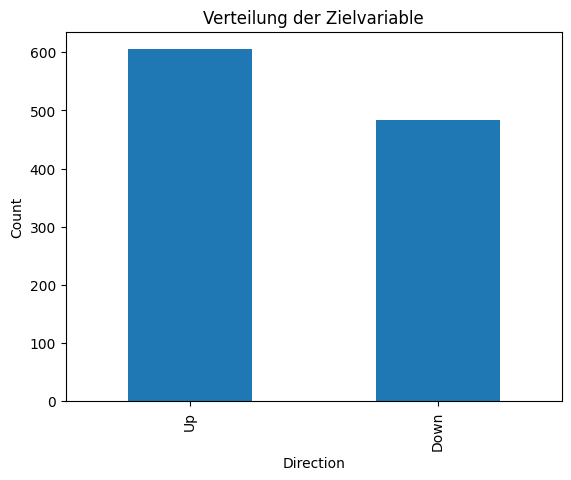

In [29]:
# Überblick über die Verteilung der Zielvariable
data['Direction'].value_counts().plot(kind='bar')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.title('Verteilung der Zielvariable')
plt.show()

## Schritt 3: Logistische Regression und Aufteilung des Datensatzes

In [31]:
from sklearn.model_selection import train_test_split

# Features und Zielvariable definieren
X = data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = data['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

# Aufteilen des Datensatzes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Logistisches Regressionsmodell trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

# Vorhersagen auf dem Testdatensatz
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

## Schritt 4: Erstellen der Konfusionsmatrix

[[ 62 172]
 [ 83 228]]


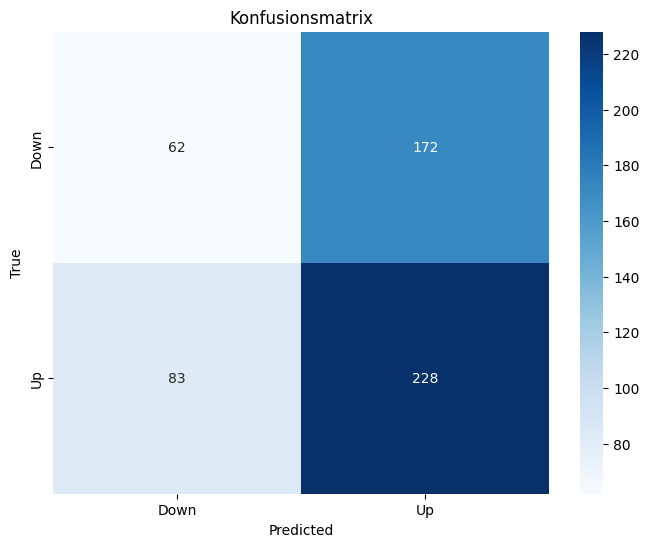

In [32]:
from sklearn.metrics import confusion_matrix

# Konfusionsmatrix erstellen
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
print(conf_matrix)

# Visualisierung der Konfusionsmatrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Konfusionsmatrix')
plt.show()

## Schritt 5: Berechnung von Genauigkeit, Präzision und Trefferquote

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Berechnungen
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Genauigkeit: {accuracy}')
print(f'Präzision: {precision}')
print(f'Trefferquote: {recall}')

Genauigkeit: 0.5321100917431193
Präzision: 0.57
Trefferquote: 0.7331189710610932


## Schritt 6: Interpretation des Ergebnisses

 Genauigkeit gibt an, wie viele der gesamten Vorhersagen korrekt waren. In diesem Fall beträgt die Genauigkeit ...

Die Präzision gibt an, wie viele der als positiv (Up) vorhergesagten Fälle tatsächlich positiv waren. In diesem Fall beträgt die Präzision ...

Die Trefferquote gibt an, wie viele der tatsächlichen positiven Fälle korrekt vorhergesagt wurden. In diesem Fall beträgt die Trefferquote ...

Wenn Sie auf Kursgewinne setzen wollen, sollten Sie die Präzision betrachten, da Sie wissen wollen, wie zuverlässig die positiven Vorhersagen sind.

## Schritt 7: Neues Modell nur mit Lag2

In [34]:
# Neues Modell nur mit Lag2
X = data[['Lag2']]
y = data['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

# Aufteilen des Datensatzes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Logistisches Regressionsmodell trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

# Vorhersagen auf dem Testdatensatz
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

## Schritt 8: Plot der Klassenwahrscheinlichkeiten

/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


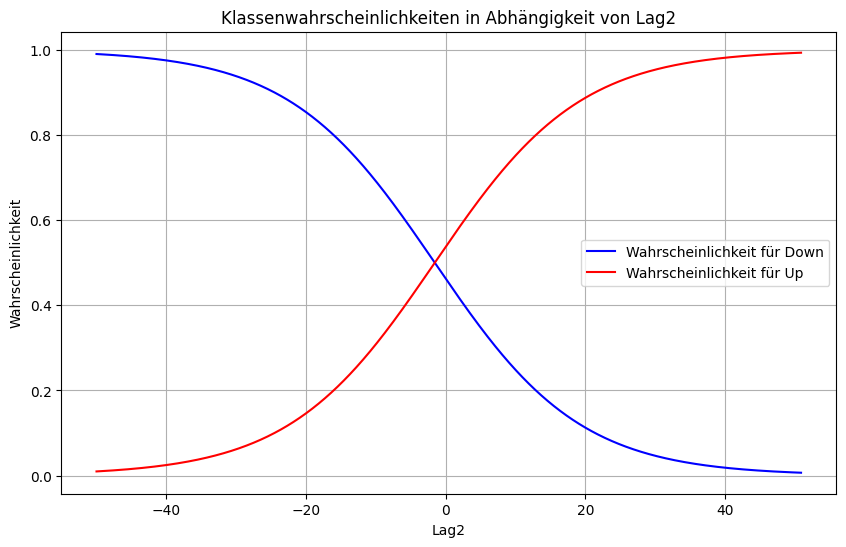

In [36]:
# Erstellen einer regelmäßigen X-Achse
x_vals = np.arange(-50, 51, 0.1).reshape(-1, 1)
y_vals = model.predict_proba(x_vals)

# Plot der Klassenwahrscheinlichkeiten
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals[:, 0], label='Wahrscheinlichkeit für Down', color='blue')
plt.plot(x_vals, y_vals[:, 1], label='Wahrscheinlichkeit für Up', color='red')
plt.xlabel('Lag2')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Klassenwahrscheinlichkeiten in Abhängigkeit von Lag2')
plt.legend()
plt.grid(True)
plt.show()

## Schritt 9: Entscheidungsoberfläche und Klassifikationsregel


#### Entscheidungsoberfläche

Die Entscheidungsoberfläche befindet sich dort, wo die Wahrscheinlichkeiten für `Up` und `Down` gleich sind, d.h. bei einer Wahrscheinlichkeit von 0,5. Dies ist der Punkt, an dem sich die beiden Kurven schneiden. In diesem Fall sehen wir, dass die Schnittstelle bei `Lag2 = 0` liegt.

#### Klassifikationsregel

Das Modell klassifiziert eine Woche als `Up`, wenn `Lag2` größer als 0 ist, und als `Down`, wenn `Lag2` kleiner oder gleich 0 ist. Dies ist die Entscheidungsregel, die aus dem logistischen Regressionsmodell hervorgeht.

### Zusammenfassung der Klassifikationsregel

- Wenn `Lag2 > 0`: Wahrscheinlichkeit für `Up` ist größer als 0,5. Die Woche wird als `Up` klassifiziert.
- Wenn `Lag2 <= 0`: Wahrscheinlichkeit für `Down` ist größer als 0,5. Die Woche wird als `Down` klassifiziert.



/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


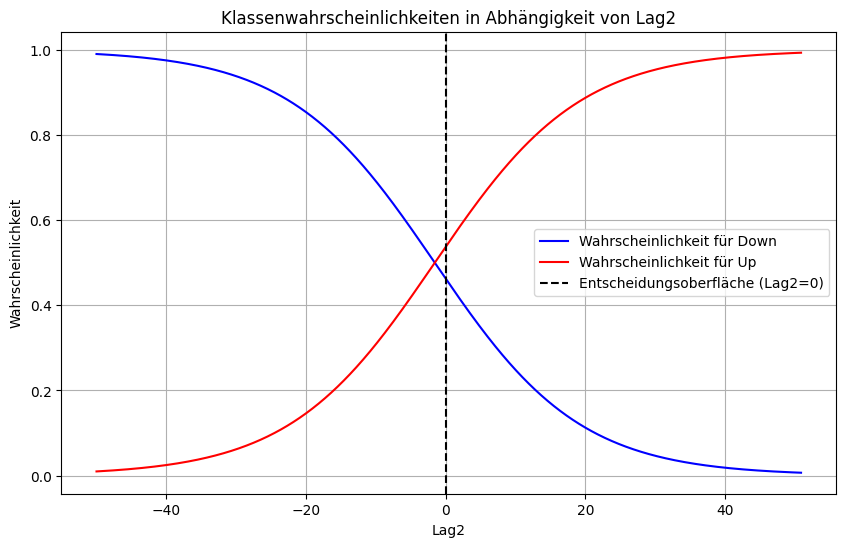

In [38]:


# Laden der CSV-Datei
data = pd.read_csv('Weekly.csv')

# Features und Zielvariable definieren
X = data[['Lag2']]
y = data['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

# Aufteilen des Datensatzes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Logistisches Regressionsmodell trainieren
model = LogisticRegression()
model.fit(X_train, y_train)

# Erstellen einer regelmäßigen X-Achse
x_vals = np.arange(-50, 51, 0.1).reshape(-1, 1)
y_vals = model.predict_proba(x_vals)

# Plot der Klassenwahrscheinlichkeiten
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals[:, 0], label='Wahrscheinlichkeit für Down', color='blue')
plt.plot(x_vals, y_vals[:, 1], label='Wahrscheinlichkeit für Up', color='red')

# Entscheidungsoberfläche einzeichnen
plt.axvline(x=0, color='black', linestyle='--', label='Entscheidungsoberfläche (Lag2=0)')

plt.xlabel('Lag2')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Klassenwahrscheinlichkeiten in Abhängigkeit von Lag2')
plt.legend()
plt.grid(True)
plt.show()